# Pips necesarios

In [ ]:
#!pip install qiskit qiskit-aer matplotlib pylatexenc



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.9 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=c8ffbcb2a6b62858158682771efd8565c7095a4c277142b4d26cdea22a9287aa
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


# 3 Qubit QFT Demostration

Base computacional |010⟩:


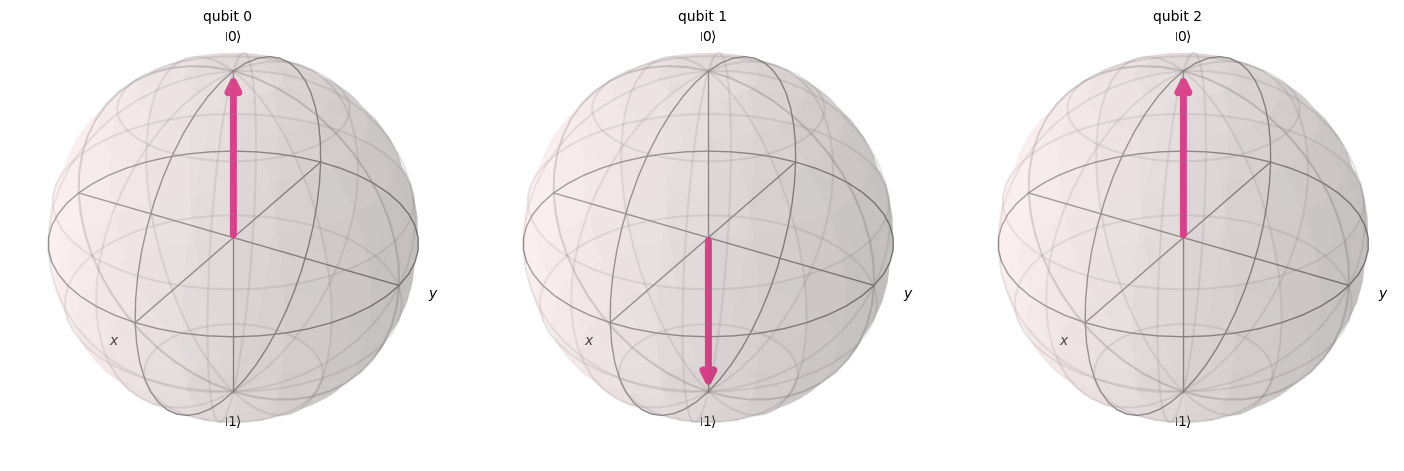


Base de Fourier tras aplicar QFT:


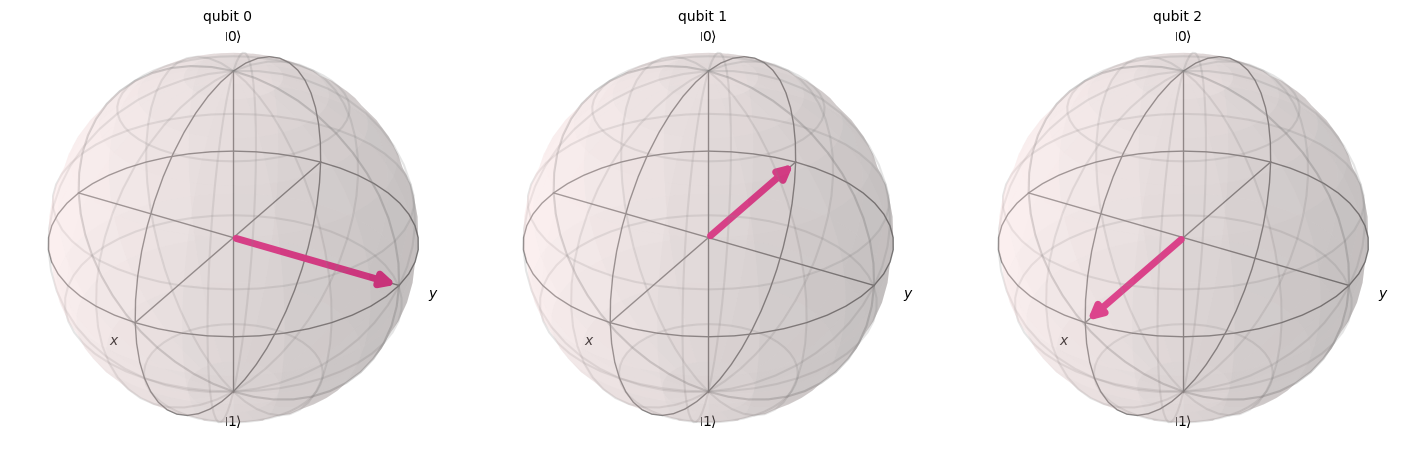

In [ ]:
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Define the initial state
initial_state = '010'

# Create a quantum circuit
qc = QuantumCircuit(len(initial_state))
qc.initialize(Statevector.from_label(initial_state).data, qc.qubits[::-1])

# Display the computational basis
print(f"Base computacional |{initial_state}⟩:")
display(plot_bloch_multivector(Statevector.from_instruction(qc).data))

# Apply the Quantum Fourier Transform (QFT)
print("\nBase de Fourier tras aplicar QFT:")
qft_gate = QFT(len(initial_state), do_swaps=True)
qc.append(qft_gate, qc.qubits)

# Display the result in the Fourier basis
display(plot_bloch_multivector(Statevector.from_instruction(qc).data))

# QFT 3 Qubits

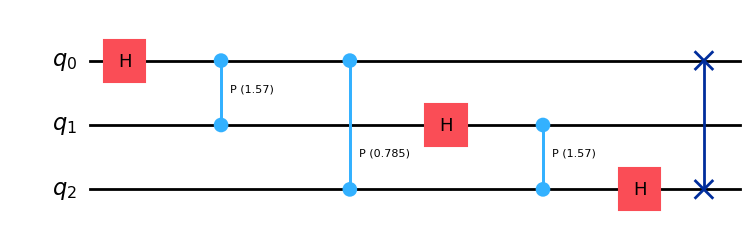

In [1]:
from qiskit import QuantumCircuit

def qft(n):
    qc = QuantumCircuit(n)
    for k in range(n):
        qc.h(k)  # Aplica la puerta H al qubit k
        for j in range(k + 1, n):
            angle = 2 * 3.14159 / (2 ** (j - k + 1))
            qc.cp(angle, j, k)  # Aplica la puerta UROTm como una fase controlada
    for i in range(n // 2):
        qc.swap(i, n - i - 1)  # Intercambia los qubits para invertir el orden
    return qc

# Crear el circuito QFT para 4 qubits
qft_circuit = qft(3)
qft_circuit.draw('mpl')

***Complejidad computacional Simon***

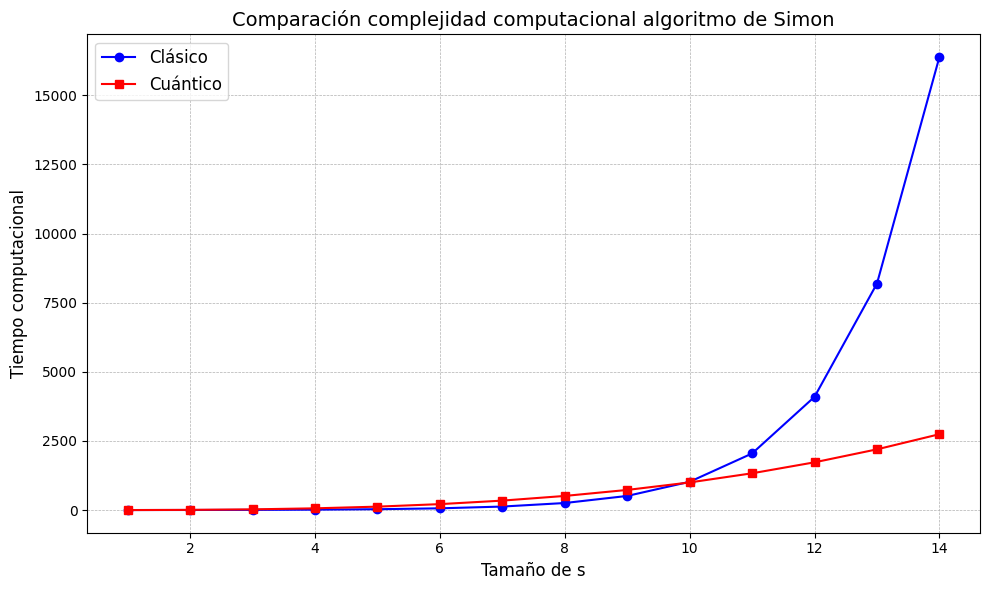

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Valores de n
n = np.arange(1, 15)  # Desde 1 hasta 20

# Funciones
y1 = 2**(n)
y2 = n**3

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(n, y1, label=r'Clásico', marker='o', color='blue')
plt.plot(n, y2, label=r'Cuántico', marker='s', color='red')

# Configuración de la gráfica
plt.title('Comparación complejidad computacional algoritmo de Simon', fontsize=14)
plt.xlabel('Tamaño de s', fontsize=12)
plt.ylabel('Tiempo computacional', fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


***Complejidad computacional Shor***

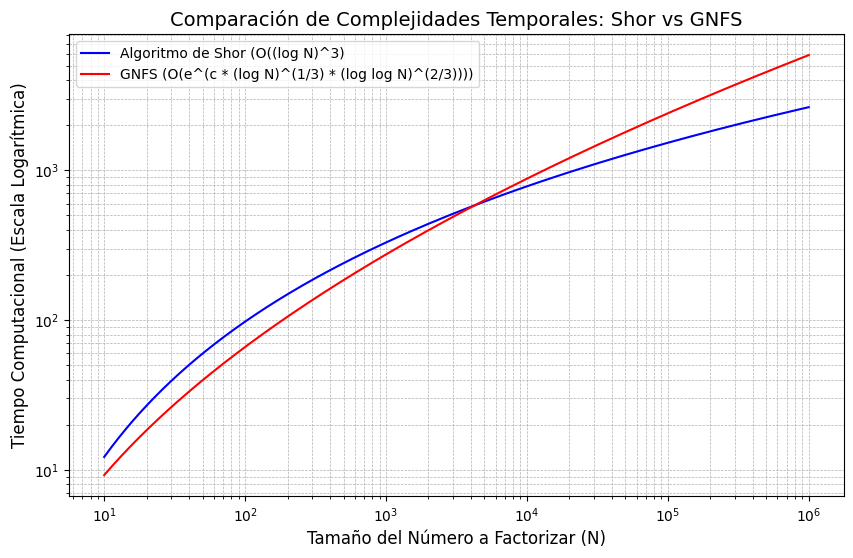

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el rango de valores de N (número a factorizar)
N_values = np.logspace(1, 6, 500)  # Valores de N desde 10^1 hasta 10^6

# Complejidad real del algoritmo de Shor: O((log N)^3)
shor_complexity = (np.log(N_values))**3

# Complejidad real del GNFS: O(e^(c * (log N)^(1/3) * (log log N)^(2/3)))
c = 1.9  # Constante más precisa según la literatura
gnfs_complexity = np.exp(c * (np.log(N_values))**(1/3) * (np.log(np.log(N_values)))**(2/3))

# Graficar las complejidades
plt.figure(figsize=(10, 6))
plt.plot(N_values, shor_complexity, label="Algoritmo de Shor (O((log N)^3)", color="blue")
plt.plot(N_values, gnfs_complexity, label="GNFS (O(e^(c * (log N)^(1/3) * (log log N)^(2/3))))", color="red")

# Configurar la gráfica
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Tamaño del Número a Factorizar (N)", fontsize=12)
plt.ylabel("Tiempo Computacional (Escala Logarítmica)", fontsize=12)
plt.title("Comparación de Complejidades Temporales: Shor vs GNFS", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Mostrar la gráfica
plt.show()

